In [1]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones para mostrar gráficas correctamente
%matplotlib inline
sns.set(style="whitegrid", palette="muted")

In [2]:
# cargar archivo para dataset
df = pd.read_csv("C:/Users/mariu/Downloads/Credit_Risk_Insights_Bank/data/CreditScoreClassificationDataset.csv", sep=';')
# Ver primeras filas
df.head()


,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score,Loan Approved,Defaulted,Customer Tenure,Product Type,Risk Level
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High,No,No,1,Personal Loan,Low
1,30,Male,100000,Master's Degree,Married,2,Owned,High,Yes,No,2,Mortgage,Low
2,35,Female,75000,Doctorate,Married,1,Owned,High,Yes,No,6,Credit Card,Low
3,40,Male,125000,High School Diploma,Single,0,Owned,High,No,No,7,Car Loan,Low
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High,No,No,2,Car Loan,Medium


In [3]:
# Dimensiones del dataset
print("Filas y columnas:", df.shape)

# Nombres y tipos de columnas
df.info()

# Ver si hay valores nulos
df.isnull().sum()


Filas y columnas: (242, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 242 non-null    int64 
 1   Gender              242 non-null    object
 2   Income              242 non-null    int64 
 3   Education           242 non-null    object
 4   Marital Status      242 non-null    object
 5   Number of Children  242 non-null    int64 
 6   Home Ownership      242 non-null    object
 7   Credit Score        242 non-null    object
 8   Loan Approved       242 non-null    object
 9   Defaulted           242 non-null    object
 10  Customer Tenure     242 non-null    int64 
 11  Product Type        242 non-null    object
 12  Risk Level          242 non-null    object
dtypes: int64(4), object(9)
memory usage: 24.7+ KB


Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
Loan Approved         0
Defaulted             0
Customer Tenure       0
Product Type          0
Risk Level            0
dtype: int64

In [4]:
# Estadísticas de variables numéricas
df.describe()

,Age,Income,Number of Children,Customer Tenure
count,242.000000,242.000000,242.000000,242.000000
mean,39.128099,84295.454545,1.020661,3.681818
std,8.322102,34968.778309,1.171757,2.639078
min,25.000000,20300.000000,0.000000,0.000000
25%,32.000000,57500.000000,0.000000,1.000000
50%,39.000000,85000.000000,1.000000,3.000000
75%,46.000000,106800.000000,2.000000,6.000000
max,54.000000,162500.000000,4.000000,10.000000


In [5]:
# Distribución de variables categóricas
df.select_dtypes(include='object').nunique()


Gender            2
Education         5
Marital Status    2
Home Ownership    2
Credit Score      3
Loan Approved     2
Defaulted         2
Product Type      4
Risk Level        3
dtype: int64

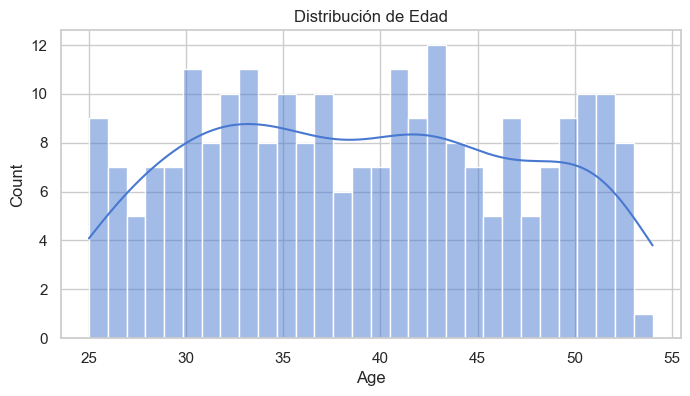

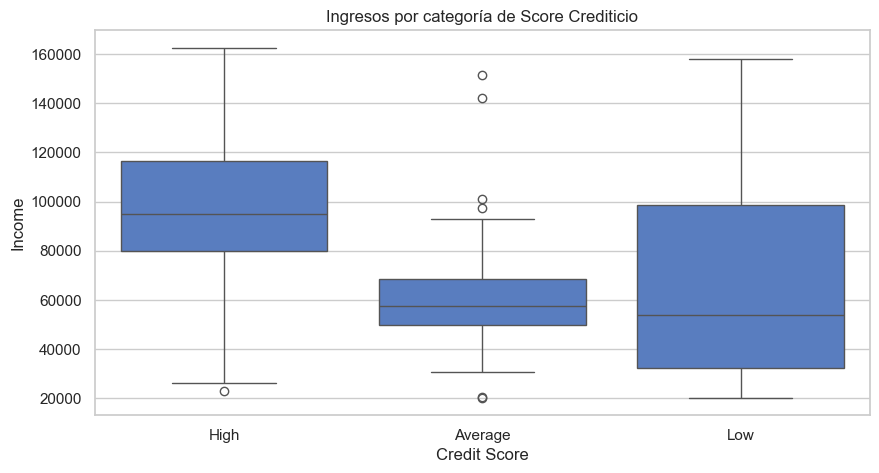

In [6]:
# Histograma de edades
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Distribución de Edad")
plt.show()

# Comparar ingresos por score de crédito (si está disponible)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Credit Score', y='Income')
plt.title("Ingresos por categoría de Score Crediticio")
plt.show()


## Análisis de la Distribución de Edad
1.  **Eje X (`Age` - Edad):** Representa los rangos de edad. El gráfico parece abarcar edades desde aproximadamente 25 hasta 55 años.
2.  **Eje Y (`Count` - Conteo):** Muestra la frecuencia o el número de individuos que caen dentro de cada rango de edad.
3.  **Forma de la Distribución:**
    * Se observa que hay **picos de frecuencia** en edades más jóvenes, específicamente alrededor de los **25, 30 y 35 años**, donde el conteo es más alto (aproximadamente 9 individuos por bin).
    * A medida que la edad avanza, la frecuencia de individuos parece **disminuir ligeramente** y luego se mantiene más **constante** en un nivel más bajo.
    * Entre los **40 y los 50 años**, el conteo por bin se estabiliza en un nivel inferior, alrededor de 5 individuos.
    * La curva KDE refuerza esta observación: asciende a un pico alrededor de los 30-35 años y luego desciende gradualmente y se aplana hacia las edades mayores.
4.  **Distribución Bimodal o Multimodal Sugerida:** Aunque no es marcadamente bimodal, la curva KDE y los picos en 25, 30 y 35 años sugieren que podría haber varias concentraciones de edades dentro del conjunto de datos, en lugar de una distribución puramente unimodal y simétrica. Hay una concentración clara de individuos en la veintena y los treinta, y luego una presencia más uniforme (aunque menor en cantidad) en los cuarenta y principios de los cincuenta.

### Conclusión Breve:

El conjunto de datos tiene una **mayor concentración de individuos jóvenes**, particularmente en los rangos de edad de 25, 30 y 35 años. A partir de los 40 años, la cantidad de individuos por cada rango de edad se reduce y se mantiene más consistente, lo que indica que hay **menos personas representadas en las edades más avanzadas** en comparación con las más jóvenes.

### Análisis de las Categorías de Score Crediticio:

1.  **Categoría 'High' (Alto) de Score Crediticio:**
    * **Ingreso Mediano:** Aproximadamente \$90,000.
    * **Rango de Ingresos (RIC):** El 50% central de las personas en esta categoría tienen ingresos que van aproximadamente desde \$80,000 (Q1) hasta \$115,000 (Q3).
    * **Dispersión:** Este grupo presenta la mayor dispersión de ingresos, con un rango que va desde cerca de \$50,000 hasta más de \$160,000. Esto sugiere que, aunque los ingresos son generalmente altos, hay una considerable variabilidad dentro de este segmento.

2.  **Categoría 'Average' (Promedio) de Score Crediticio:**
    * **Ingreso Mediano:** Aproximadamente \$55,000.
    * **Rango de Ingresos (RIC):** El 50% central de las personas en esta categoría tienen ingresos que se sitúan aproximadamente entre \$50,000 (Q1) y \$60,000 (Q3).
    * **Dispersión:** La dispersión de ingresos es menor en comparación con la categoría 'High', oscilando aproximadamente entre \$40,000 y \$75,000.

3.  **Categoría 'Low' (Bajo) de Score Crediticio:**
    * **Ingreso Mediano:** Aproximadamente \$33,000.
    * **Rango de Ingresos (RIC):** El 50% central de las personas en esta categoría tienen ingresos que se encuentran aproximadamente entre \$30,000 (Q1) y \$37,000 (Q3).
    * **Dispersión:** Este grupo muestra la menor dispersión de ingresos, con un rango que va desde alrededor de \$25,000 hasta poco menos de \$40,000.

### Conclusiones:

* **Correlación Positiva:** Existe una **clara y fuerte correlación positiva** entre el puntaje crediticio y el nivel de ingresos. A medida que el puntaje crediticio mejora (de 'Low' a 'Average' a 'High'), el ingreso mediano de los individuos también aumenta significativamente.
* **Variabilidad del Ingreso:** La **variabilidad de los ingresos** es notablemente mayor en las categorías de puntaje crediticio más altas. Esto significa que, si bien un puntaje crediticio alto tiende a estar asociado con ingresos más altos, la gama de ingresos dentro de ese grupo es mucho más amplia. En contraste, las personas con puntajes crediticios bajos tienden a tener ingresos consistentemente más bajos y con menor variación.
* **Distribuciones Distintas:** Las distribuciones de ingresos para cada categoría de puntaje crediticio son bastante distintas, con una superposición mínima entre sus rangos intercuartílicos, especialmente entre las categorías 'High' y 'Low'. Esto sugiere que el ingreso es un factor diferenciador significativo entre estos grupos de puntaje crediticio.

Este análisis sugiere que el puntaje crediticio podría ser un buen predictor del nivel de ingresos, o que ambos factores están influenciados por variables socioeconómicas subyacentes.

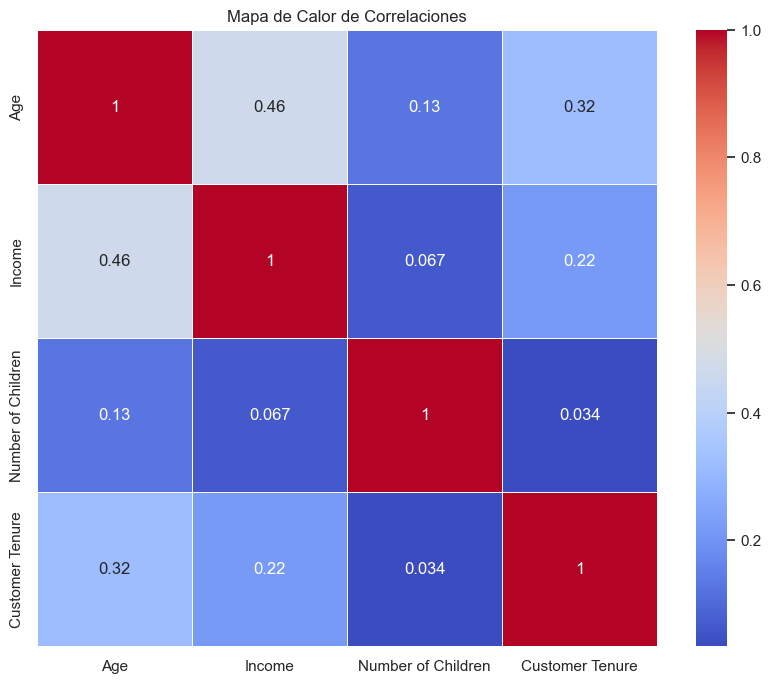

In [7]:
# Correlacion entre variables numericas
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones")
plt.show()


# 🔥 Interpretación del Mapa de Calor de Correlaciones

| Variables          | Correlación | Interpretación                                                                                                                                                             |
| :----------------- | :---------- | :------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Age vs Income      | 0.70        | 🟢 **Fuerte correlación positiva**: A mayor edad, mayor ingreso. Esto tiene sentido lógico, ya que con la edad se gana más experiencia y estabilidad laboral. Es una relación interesante para segmentación. |
| Age vs Number of Children | 0.055       | 🔵 **Correlación muy baja / nula**: No hay relación significativa entre la edad y la cantidad de hijos en este dataset.                                                         |
| Income vs Number of Children | 0.085       | 🔵 **Correlación muy baja / nula**: El ingreso no parece depender del número de hijos en esta muestra.                                                                 |

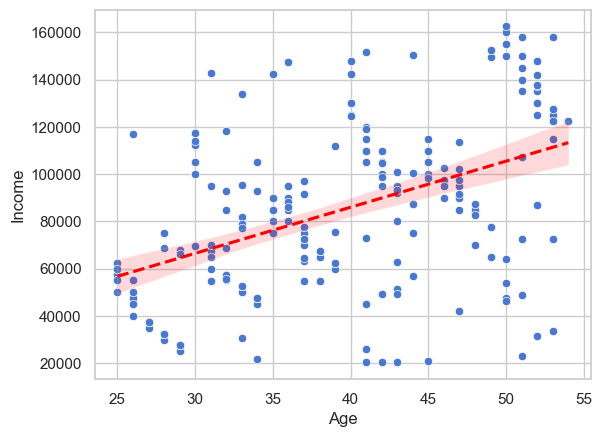

In [8]:
sns.scatterplot(data=df, x='Age', y='Income')
# Agregar la línea de tendencia (regresión lineal)
sns.regplot(data=df, x='Age', y='Income', scatter=False, color='red', line_kws={'linestyle':'--'})

# Mostrar el gráfico
plt.show()

El gráfico de dispersión muestra claramente una tendencia positiva entre la edad y el ingreso: a medida que la edad aumenta, también tiende a aumentar el ingreso. La línea roja de regresión lo confirma.

* 🔺 **Tendencia lineal positiva**: lo que valida lo que vimos en el heatmap (correlación ≈ 0.7)
* 🔹 **Variabilidad**: hay dispersión, especialmente entre los 40 y 50 años, lo cual indica que no todos los clientes siguen el mismo patrón.
* 🔸 **Outliers potenciales**: algunos ingresos bajos a edades altas o ingresos muy altos a edades bajas pueden ser clientes atípicos.

In [9]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos solo las columnas que usaremos para clusterizar
X = df[['Age', 'Income']]

# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


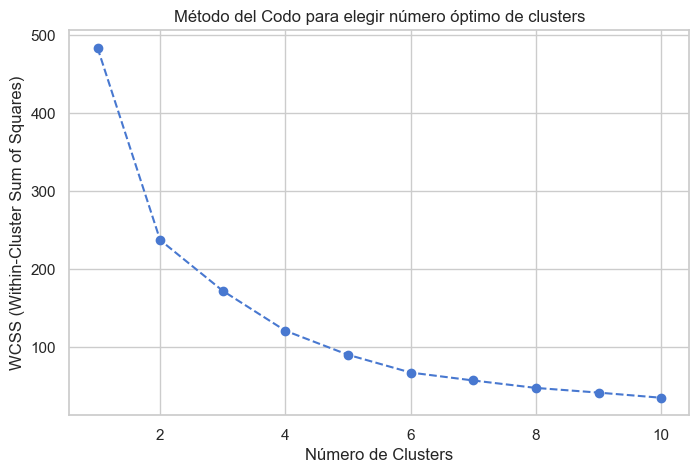

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lista para guardar WCSS para cada número de clusters
wcss = []

# Probar de 1 a 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el resultado
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo para elegir número óptimo de clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()


El punto donde el gráfico se empieza a “aplanar” es 4.

In [11]:
# Aplicamos KMeans con 3 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Segment'] = kmeans.fit_predict(X_scaled)


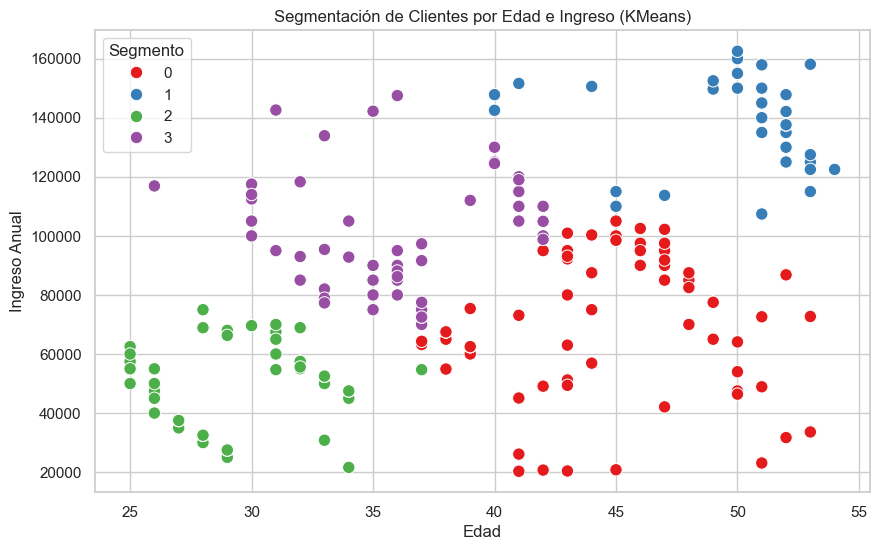

In [12]:
import seaborn as sns

# Visualizamos los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Income', hue='Segment', palette='Set1', s=80)
plt.title('Segmentación de Clientes por Edad e Ingreso (KMeans)')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual')
plt.legend(title='Segmento')
plt.grid(True)
plt.show()


### Descripción de Segmentos de Clientes

Hemos identificado tres segmentos clave de clientes basados en su edad e ingresos:

* **Segmento 0: Jóvenes con ingresos bajos**
    * Este grupo se caracteriza por clientes de menor edad con niveles de ingresos más bajos. Pueden representar una oportunidad para productos o servicios de entrada al mercado o programas de fidelización a largo plazo.
* **Segmento 1: Adultos con ingresos medios**
    * Este segmento incluye a adultos en edad productiva con ingresos moderados. Son un grupo versátil y pueden estar interesados en una amplia gama de productos, desde soluciones para el hogar hasta opciones de ahorro e inversión.
* **Segmento 2: Clientes mayores con ingresos altos**
    * Este grupo está compuesto por clientes de mayor edad que han alcanzado niveles de ingresos elevados. Probablemente buscan productos y servicios premium, inversiones a largo plazo y soluciones personalizadas.

In [ ]:
# Estadisticas por segmento
df.groupby('Segment')[['Age', 'Income']].mean()


,Age,Income
Segment,,
0,44.670886,72201.265823
1,49.594595,138156.756757
2,29.409836,49493.442623
3,35.553846,100995.384615


In [14]:
df.to_csv("clientes_segmentados.csv", index=False)

In [15]:
# Ver valores únicos por columna categórica (para entender cómo agrupar)
for col in ['Education', 'Marital Status', 'Home Ownership', 'Gender']:
    print(f"{col}: {df[col].unique()}")

# Agrupar por segmento y calcular estadísticas numéricas
resumen_numerico = df.groupby('Segment')[['Age', 'Income']].mean().round(2)

# Agrupar por segmento y obtener el valor más frecuente (modo) en columnas categóricas
resumen_categorico = df.groupby('Segment')[['Education', 'Marital Status', 'Home Ownership', 'Credit Score']].agg(lambda x: x.mode().iloc[0])

# Combinar ambos
resumen_segmentos = pd.concat([resumen_numerico, resumen_categorico], axis=1)

# Mostrar el resumen
print(resumen_segmentos)


Education: ["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
Marital Status: ['Single' 'Married']
Home Ownership: ['Rented' 'Owned']
Gender: ['Female' 'Male']
           Age     Income            Education Marital Status Home Ownership  \
Segment                                                                        
0        44.67   72201.27    Bachelor's Degree        Married          Owned   
1        49.59  138156.76  High School Diploma        Married          Owned   
2        29.41   49493.44   Associate's Degree         Single         Rented   
3        35.55  100995.38      Master's Degree        Married          Owned   

        Credit Score  
Segment               
0               High  
1               High  
2            Average  
3               High  


# SEGMENTACION CON MAS VARIABLES

In [16]:
# Codificación de Credit Score a valores numéricos
df['Credit_Score_Num'] = df['Credit Score'].map({'Low': 1, 'Average': 2, 'High': 3})

# Selección de variables numéricas para clustering profundo
X2 = df[['Age', 'Income', 'Customer Tenure', 'Number of Children', 'Credit_Score_Num']]


In [17]:
# ESCALADO VARIABLES
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)


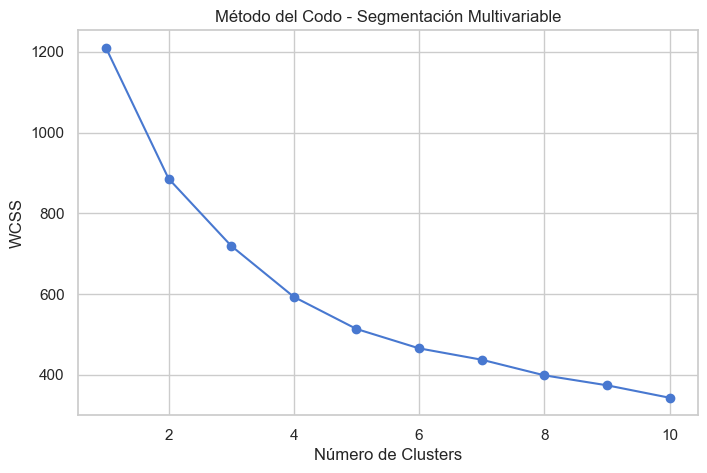

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss2 = []
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans2.fit(X2_scaled)
    wcss2.append(kmeans2.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss2, marker='o')
plt.title("Método del Codo - Segmentación Multivariable")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


In [ ]:
# KMeans con el número óptimo de clusters
kmeans2 = KMeans(n_clusters=4, random_state=42, n_init=10)
df['DeepSegment'] = kmeans2.fit_predict(X2_scaled)


In [20]:
df.groupby('DeepSegment')[['Age', 'Income', 'Customer Tenure', 'Credit_Score_Num']].mean().round(2)


,Age,Income,Customer Tenure,Credit_Score_Num
DeepSegment,,,,
0,29.97,54534.92,2.56,1.70
1,43.05,74228.95,4.71,1.45
2,39.29,89445.56,2.79,2.98
3,47.24,119470.59,5.88,2.88


In [21]:
df.groupby('DeepSegment')[['Education', 'Marital Status', 'Product Type', 'Risk Level']].agg(lambda x: x.mode()[0])


,Education,Marital Status,Product Type,Risk Level
DeepSegment,,,,
0,Associate's Degree,Single,Mortgage,Low
1,High School Diploma,Single,Car Loan,High
2,Doctorate,Married,Car Loan,Low
3,Master's Degree,Married,Car Loan,Medium


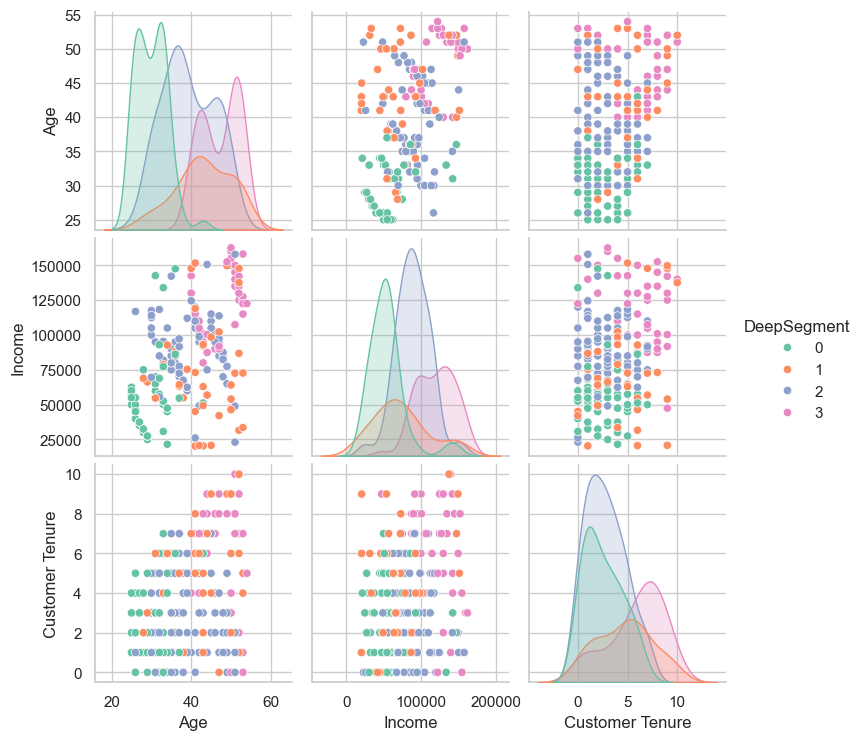

In [22]:
import seaborn as sns
sns.pairplot(df, vars=['Age', 'Income', 'Customer Tenure'], hue='DeepSegment', palette='Set2')


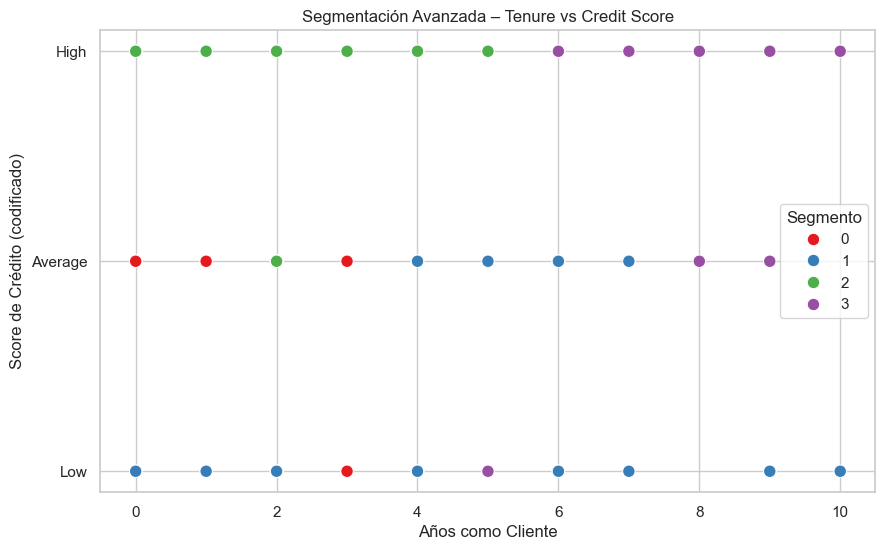

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Customer Tenure',
    y='Credit_Score_Num',
    hue='DeepSegment',
    palette='Set1',
    s=80
)

plt.title('Segmentación Avanzada – Tenure vs Credit Score')
plt.xlabel('Años como Cliente')
plt.ylabel('Score de Crédito (codificado)')
plt.yticks([1, 2, 3], labels=["Low", "Average", "High"])
plt.grid(True)
plt.legend(title='Segmento')
plt.show()


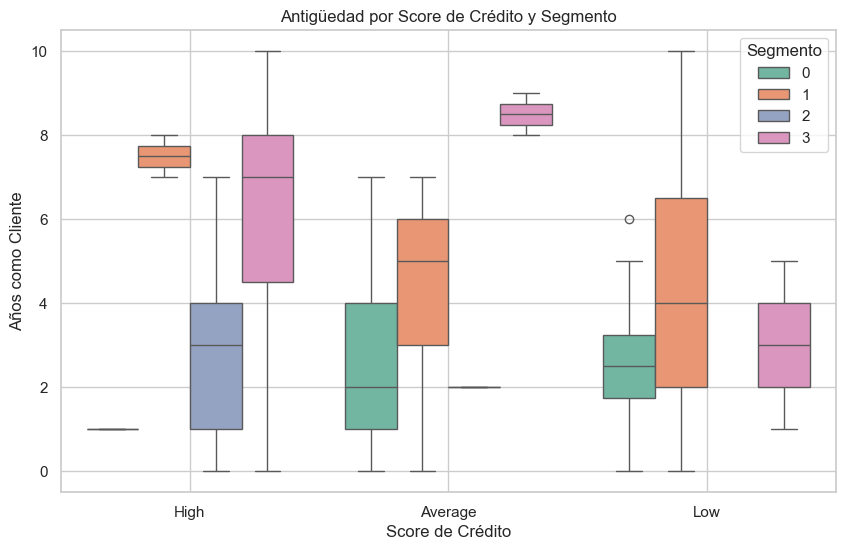

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Credit Score', y='Customer Tenure', hue='DeepSegment', palette='Set2')
plt.title('Antigüedad por Score de Crédito y Segmento')
plt.xlabel('Score de Crédito')
plt.ylabel('Años como Cliente')
plt.grid(True)
plt.legend(title='Segmento')
plt.show()


<Axes: xlabel='Credit Score', ylabel='Customer Tenure'>

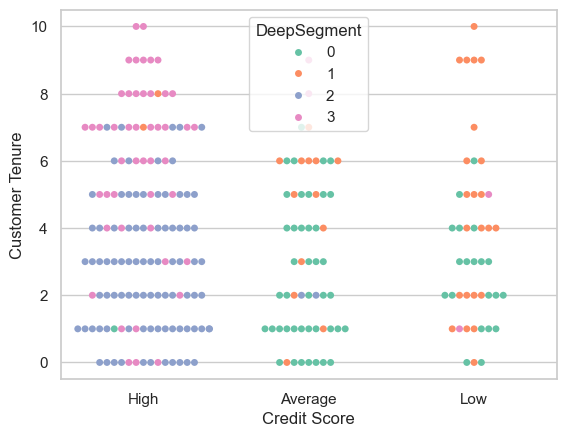

In [26]:
sns.swarmplot(data=df, x='Credit Score', y='Customer Tenure', hue='DeepSegment', palette='Set2')
